In [60]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv('spam.csv', encoding = 'latin1')

In [62]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [63]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

Data cleaning

In [65]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [66]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [67]:
df = df.rename(columns={'v1': 'target', 'v2': 'text'})


In [68]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [69]:
unique_values = df['target'].unique()
print(unique_values)

['ham' 'spam']


In [70]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the target column
df['target'] = encoder.fit_transform(df['target'])



In [71]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [72]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [73]:
df.duplicated().sum()

403

In [74]:
df = df.drop_duplicates(keep='first')

In [75]:
df.duplicated().sum()

0

EDA

In [76]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [77]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

# The data is imblance as o is 4516 times whereas 1 is only 653 times.

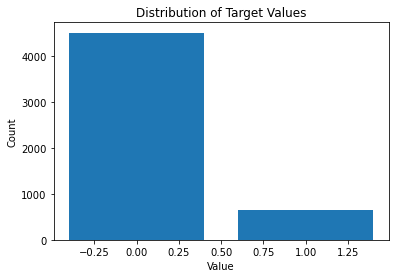

In [78]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the target column
value_counts = df['target'].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of Target Values')

# Show the plot
plt.show()


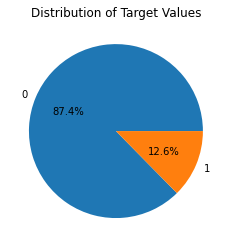

In [79]:


# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Target Values')

# Show the plot
plt.show()


In [80]:
import nltk

In [81]:
df['character_count'] = df['text'].str.len()


C:\Users\Tipu Sultan\AppData\Local\Temp\ipykernel_5948\3823620238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['character_count'] = df['text'].str.len()


In [82]:
df

,target,text,character_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [83]:
df['word_count'] = df['text'].str.split().str.len()


C:\Users\Tipu Sultan\AppData\Local\Temp\ipykernel_5948\4186341231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['text'].str.split().str.len()


In [84]:
df.head(5)

,target,text,character_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [85]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Tipu
[nltk_data]     Sultan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [86]:
# Function to count the number of sentences
def count_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return len(sentences)

# Apply the count_sentences function to the text column and create a new column
df['sentence_count'] = df['text'].apply(count_sentences)

C:\Users\Tipu Sultan\AppData\Local\Temp\ipykernel_5948\1637261569.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence_count'] = df['text'].apply(count_sentences)


In [87]:
df.head(5)

,target,text,character_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [88]:
df[['character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.947185
std,58.236293,11.068488,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,1.000000
75%,117.000000,22.000000,2.000000
max,910.000000,171.000000,28.000000


In [89]:
target_1_df = df[df['target'] == 1]
target_1_describe = target_1_df.describe()
print(target_1_describe)


       target  character_count  word_count  sentence_count
count   653.0       653.000000  653.000000      653.000000
mean      1.0       137.891271   23.681470        2.967841
std       0.0        30.137753    5.967672        1.483201
min       1.0        13.000000    2.000000        1.000000
25%       1.0       132.000000   22.000000        2.000000
50%       1.0       149.000000   25.000000        3.000000
75%       1.0       157.000000   28.000000        4.000000
max       1.0       224.000000   35.000000        8.000000


In [90]:
target_1_df = df[df['target'] == 0]
target_1_describe = target_1_df.describe()
print(target_1_describe)


       target  character_count   word_count  sentence_count
count  4516.0      4516.000000  4516.000000     4516.000000
mean      0.0        70.459256    14.134632        1.799601
std       0.0        56.358207    11.116240        1.278465
min       0.0         2.000000     1.000000        1.000000
25%       0.0        34.000000     7.000000        1.000000
50%       0.0        52.000000    11.000000        1.000000
75%       0.0        90.000000    18.000000        2.000000
max       0.0       910.000000   171.000000       28.000000


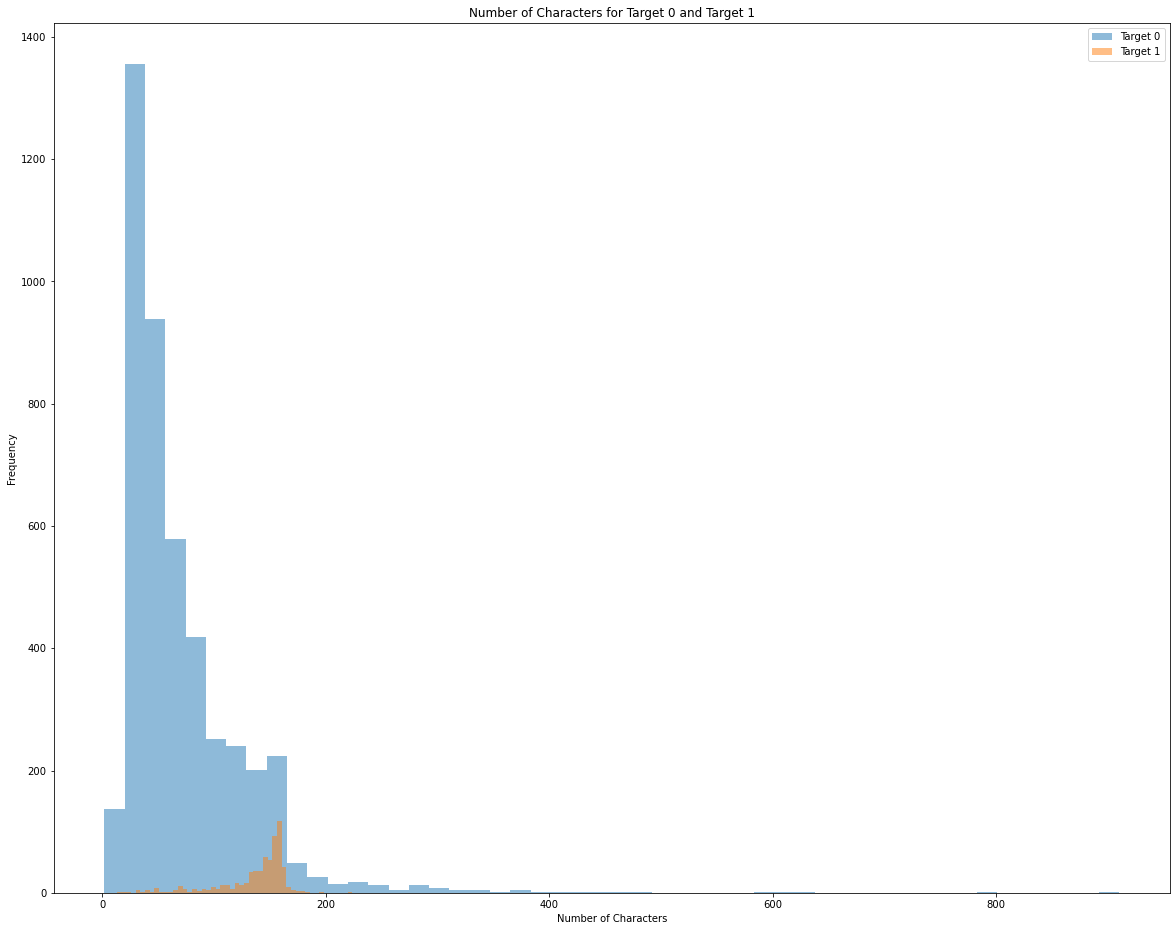

In [91]:
plt.figure(figsize=(20,16))
# Filter the DataFrame for target value 0 and 1
target_0_df = df[df['target'] == 0]
target_1_df = df[df['target'] == 1]

# Plot histograms for number of characters
plt.hist(target_0_df['text'].str.len(), alpha=0.5, label='Target 0', bins=50)
plt.hist(target_1_df['text'].str.len(), alpha=0.5, label='Target 1', bins=50)

# Add labels and title
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Number of Characters for Target 0 and Target 1')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [92]:
from scipy import stats

# remove outliers from a text column

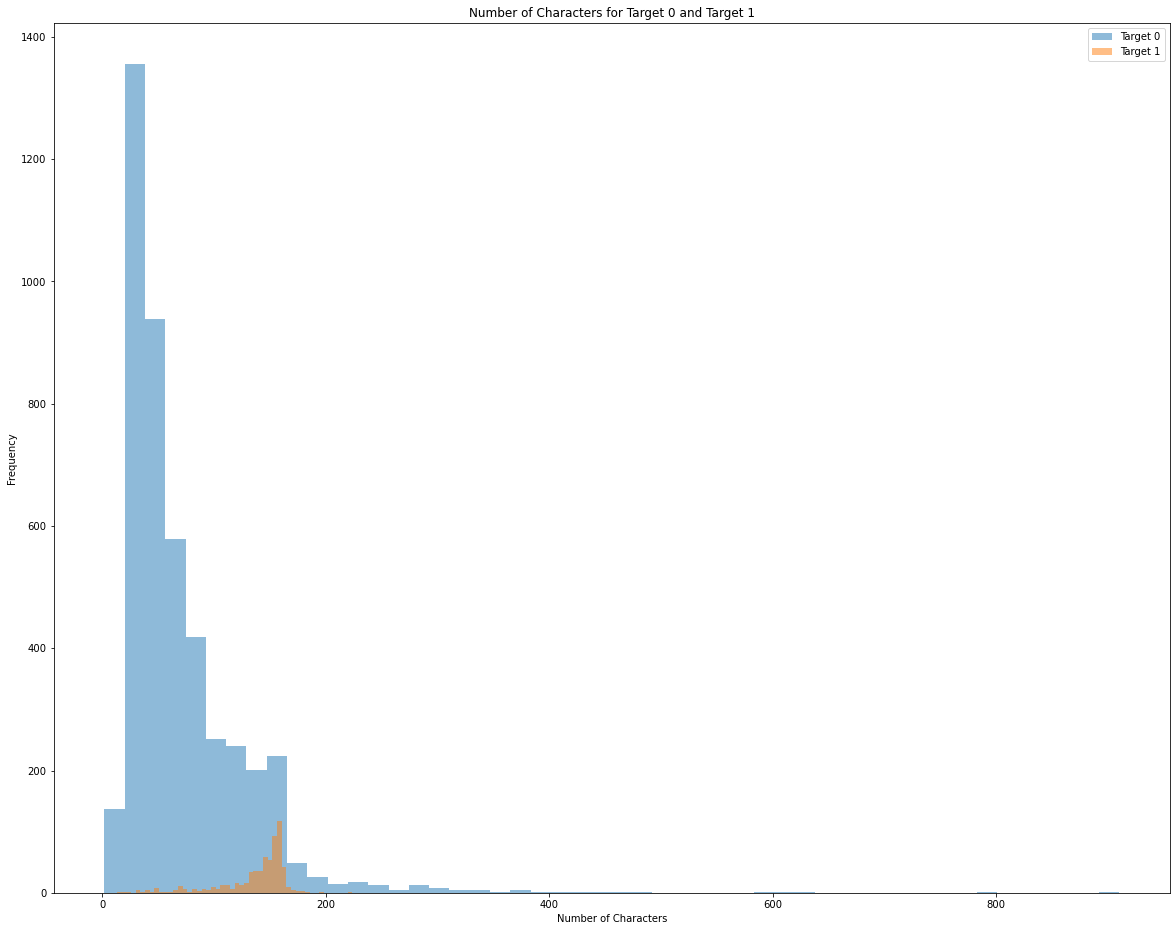

In [93]:
plt.figure(figsize=(20,16))
# Filter the DataFrame for target value 0 and 1
target_0_df = df[df['target'] == 0]
target_1_df = df[df['target'] == 1]

# Plot histograms for number of characters
plt.hist(target_0_df['text'].str.len(), alpha=0.5, label='Target 0', bins=50)
plt.hist(target_1_df['text'].str.len(), alpha=0.5, label='Target 1', bins=50)

# Add labels and title
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Number of Characters for Target 0 and Target 1')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [94]:
import seaborn as sns

In [95]:
df.head(3)

,target,text,character_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2


<AxesSubplot:xlabel='word_count', ylabel='Count'>

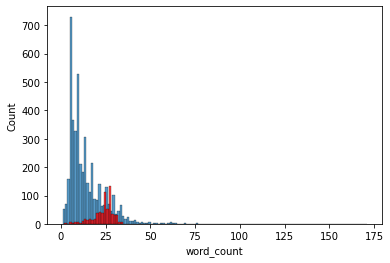

In [96]:
sns.histplot(df[df['target'] == 0]['word_count'])
sns.histplot(df[df['target'] == 1]['word_count'],color='red')

<AxesSubplot:xlabel='sentence_count', ylabel='Count'>

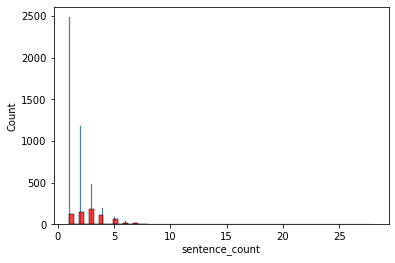

In [97]:
sns.histplot(df[df['target'] == 0]['sentence_count'])
sns.histplot(df[df['target'] == 1]['sentence_count'],color='red')

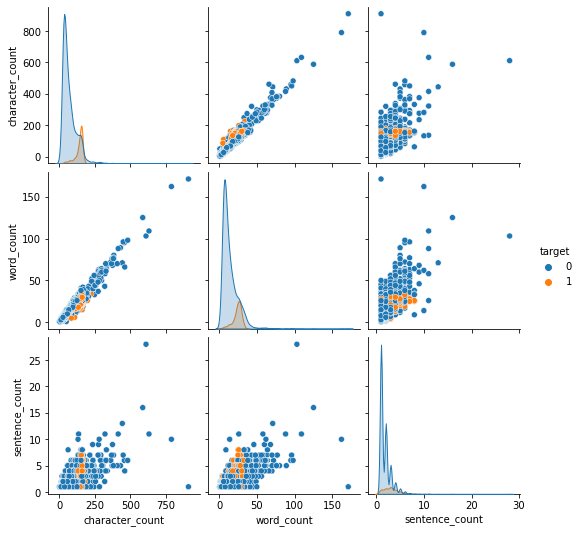

In [98]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

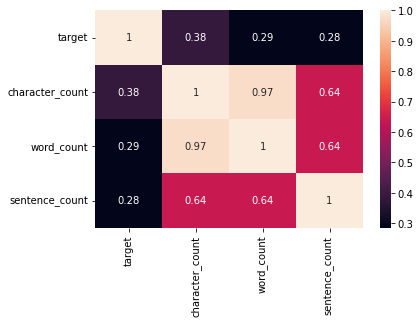

In [99]:
sns.heatmap(df.corr(),annot=True)

# We can see it has really high corelation with character_count

# 3. Data Preprocessing¶
# Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# Stemming

In [100]:
df['transformed_text'] = df['text'].apply(lambda x: x.lower() if isinstance(x, str) else x)


C:\Users\Tipu Sultan\AppData\Local\Temp\ipykernel_5948\3327514451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(lambda x: x.lower() if isinstance(x, str) else x)


In [101]:
df

,target,text,character_count,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,"go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,"nah i don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,4,this is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1,will ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,2,"pity, * was in mood for that. so...any other s..."
5570,0,The guy did some bitching but I acted like i'd...,125,26,1,the guy did some bitching but i acted like i'd...


In [102]:

df['transformed_text'] = df['text'].astype(str).apply(lambda x: nltk.word_tokenize(x))


C:\Users\Tipu Sultan\AppData\Local\Temp\ipykernel_5948\3808241848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].astype(str).apply(lambda x: nltk.word_tokenize(x))


In [103]:
df.head(3)

,target,text,character_count,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,29,6,2,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."


In [104]:
df['transformed_text'] = df['text'].astype(str).apply(lambda x: ' '.join(word for word in nltk.word_tokenize(x) if word.isalnum()))

C:\Users\Tipu Sultan\AppData\Local\Temp\ipykernel_5948\3880084993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].astype(str).apply(lambda x: ' '.join(word for word in nltk.word_tokenize(x) if word.isalnum()))


In [106]:
df['transformed_text'][10]

'I gon na be home soon and i do want to talk about this stuff anymore tonight k I cried enough today'

In [107]:
import nltk
from nltk.corpus import stopwords
import string

# Download the necessary resources
nltk.download('stopwords')

# Remove stop words and punctuation from text
def remove_stopwords_and_punctuation(text):
    stop_words = set(stopwords.words('english'))  # Set of English stop words
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    # Join the filtered tokens back into a single string
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Apply the function to the 'text' column
df['transformed_text'] = df['text'].apply(remove_stopwords_and_punctuation)


[nltk_data] Downloading package stopwords to C:\Users\Tipu
[nltk_data]     Sultan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Tipu Sultan\AppData\Local\Temp\ipykernel_5948\2848365074.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(remove_stopwords_and_punctuation)


In [108]:
df['transformed_text'][0]

'Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat'

In [109]:
import nltk
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Perform stemming on text
def stem_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Apply stemming to each token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    # Join the stemmed tokens back into a single string
    stemmed_text = ' '.join(stemmed_tokens)
    return stemmed_text

# Apply the function to the 'text' column
df['transformed_text'] = df['text'].apply(stem_text)


C:\Users\Tipu Sultan\AppData\Local\Temp\ipykernel_5948\2009935966.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(stem_text)


In [110]:
df['transformed_text'][0]

'go until jurong point , crazi .. avail onli in bugi n great world la e buffet ... cine there got amor wat ...'

In [111]:
df.head(5)

,target,text,character_count,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,"go until jurong point , crazi .. avail onli in..."
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say so earli hor ... u c alreadi then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,"nah i do n't think he goe to usf , he live aro..."


In [115]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [116]:
#pip install wordcloud


In [117]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [126]:
!pip install matplotlib==3.4.3


  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\tipu sultan\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



In [137]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string

# Function to transform the text
def transform_text(text):
    y = []
    for word in text.split():
        word = word.strip().lower()
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(word)
    return y

# Filter the dataframe based on the target value
filtered_df = df[df['target'] == 1]

# Concatenate the transformed_text column
filtered_text = filtered_df['transformed_text'].str.cat(sep=' ')

# Transform the text
transformed_text = transform_text(filtered_text)

# Get the word frequencies
word_frequencies = {word: transformed_text.count(word) for word in set(transformed_text)}

# Sort the word frequencies in descending order
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Get the top 30 words
top_30_words1 = [word for word, frequency in sorted_word_frequencies[:30]]

# Print the top 30 words
print(top_30_words)


['...', 'u', '..', "'s", 'go', "'m", 'get', "n't", '2', 'gt', 'lt', 'come', 'got', 'know', 'like', 'thi', 'ok', 'call', 'time', 'love', 'wa', 'good', 'want', "''", 'ur', "'ll", 'day', 'need', 'hi', 'one']


In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string

# Function to transform the text
def transform_text(text):
    y = []
    for word in text.split():
        word = word.strip().lower()
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(word)
    return y

# Filter the dataframe based on the target value
filtered_df = df[df['target'] == 0]

# Concatenate the transformed_text column
filtered_text = filtered_df['transformed_text'].str.cat(sep=' ')

# Transform the text
transformed_text = transform_text(filtered_text)

# Get the word frequencies
word_frequencies = {word: transformed_text.count(word) for word in set(transformed_text)}

# Sort the word frequencies in descending order
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Get the top 30 words
top_30_words2 = [word for word, frequency in sorted_word_frequencies[:30]]

# Print the top 30 words
print(top_30_words2)


['...', 'u', '..', "'s", 'go', "'m", 'get', "n't", '2', 'gt', 'lt', 'come', 'got', 'know', 'like', 'thi', 'ok', 'call', 'time', 'love', 'wa', 'good', 'want', "''", 'ur', "'ll", 'day', 'need', 'hi', 'one']


In [140]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

C:\Users\Tipu Sultan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


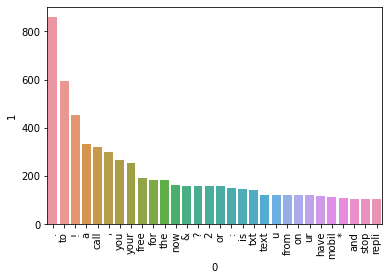

In [141]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [142]:
spam_corpus1 = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus1.append(word)

C:\Users\Tipu Sultan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


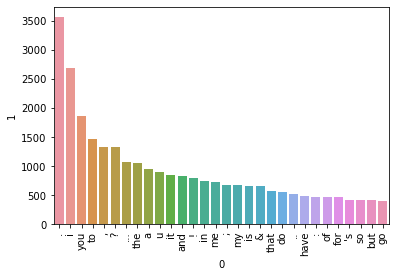

In [143]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus1).most_common(30))[0],pd.DataFrame(Counter(spam_corpus1).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [144]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
#max_features=3000 can be changed to check the model improvement


In [145]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [146]:
x1 = cv.fit_transform(df['transformed_text']).toarray()

In [147]:
y = df['target'].values

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [150]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [151]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [152]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8849129593810445
[[797  99]
 [ 20 118]]
0.543778801843318


In [153]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [154]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9845261121856866
[[893   3]
 [ 13 125]]
0.9765625


In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [156]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [157]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [158]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [159]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9806576402321083, 0.9758064516129032)

In [160]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9806576402321083
Precision -  0.9758064516129032
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8695652173913043
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655
For  RF
Accuracy -  0.9777562862669246
Precision -  1.0
For  AdaBoost
Accuracy -  0.9709864603481625
Precision -  0.9354838709677419
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.890625
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9578947368421052
For  xgb
Accuracy -  0.9816247582205029
Precision -  0.968503937007874


In [161]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [162]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.970986,1.000000
5,RF,0.977756,1.000000
8,ETC,0.980658,0.983607
0,SVC,0.980658,0.975806
10,xgb,0.981625,0.968504
9,GBDT,0.950677,0.957895
4,LR,0.967118,0.948276
6,AdaBoost,0.970986,0.935484
7,BgC,0.963250,0.890625


In [163]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [164]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.977756
3,ETC,Accuracy,0.980658
4,SVC,Accuracy,0.980658
5,xgb,Accuracy,0.981625
6,GBDT,Accuracy,0.950677
7,LR,Accuracy,0.967118
8,AdaBoost,Accuracy,0.970986
9,BgC,Accuracy,0.963250


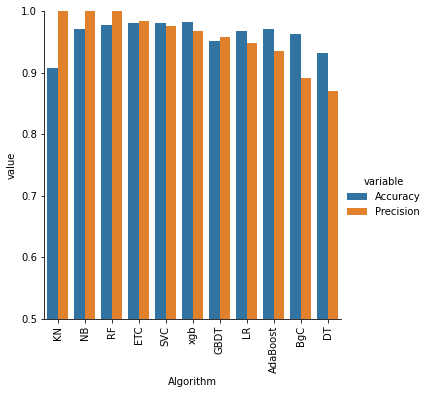

In [165]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model Improve

In [166]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [167]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.907157,1.000000
2,NB,0.970986,1.000000
5,RF,0.977756,1.000000
8,ETC,0.980658,0.983607
0,SVC,0.980658,0.975806
10,xgb,0.981625,0.968504
9,GBDT,0.950677,0.957895
4,LR,0.967118,0.948276
6,AdaBoost,0.970986,0.935484
7,BgC,0.963250,0.890625


In [168]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [169]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [170]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [171]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [172]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.977756,1.000000,0.977756,1.000000,0.977756,1.000000,0.977756,1.000000
3,ETC,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
4,SVC,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806
5,xgb,0.981625,0.968504,0.981625,0.968504,0.981625,0.968504,0.981625,0.968504
6,GBDT,0.950677,0.957895,0.950677,0.957895,0.950677,0.957895,0.950677,0.957895
7,LR,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
8,AdaBoost,0.970986,0.935484,0.970986,0.935484,0.970986,0.935484,0.970986,0.935484
9,BgC,0.963250,0.890625,0.963250,0.890625,0.963250,0.890625,0.963250,0.890625


In [173]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [174]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [175]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [176]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.991869918699187


In [177]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [178]:
from sklearn.ensemble import StackingClassifier

In [179]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [180]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9485294117647058


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))